In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

# --------------------------
# Load dataset
# --------------------------
df = pd.read_csv("Computer Productivity Dataset.csv", sep=",")

# Fix case: if CSV loads as one column
if len(df.columns) == 1:
    df = df.iloc[:, 0].str.split(",", expand=True)
    df.columns = ["user_id", "time", "app_name", "duration_seconds", "is_productive"]

# Convert datatypes
df["duration_seconds"] = pd.to_numeric(df["duration_seconds"], errors="coerce")
df["is_productive"] = df["is_productive"].map({"TRUE": 1, "FALSE": 0})

# Extract features
df["time"] = pd.to_datetime(df["time"], errors="coerce")
df["hour"] = df["time"].dt.hour

# Encode categorical app names
le_app = LabelEncoder()
df["app_encoded"] = le_app.fit_transform(df["app_name"])

# --------------------------
# Features & Target
# --------------------------
X = df[["duration_seconds", "hour", "app_encoded"]]
y = df["is_productive"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------------
# Models to compare
# --------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Results")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# --------------------------
# Pick the best model
# --------------------------
best_model_name = max(results, key=results.get)
print(f"\n Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.2f}")

best_model = models[best_model_name]

# --------------------------
# Save best model
# --------------------------
import joblib
joblib.dump(best_model, "productivity_model.pkl")
print("Model saved as productivity_model.pkl")


C:\Users\bawantha\AppData\Local\Temp\ipykernel_4028\547672681.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"], errors="coerce")
C:\Users\bawantha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\bawantha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[


Logistic Regression Results
Accuracy: 0.7725856697819314
Confusion Matrix:
 [[  0 292]
 [  0 992]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       292
           1       0.77      1.00      0.87       992

    accuracy                           0.77      1284
   macro avg       0.39      0.50      0.44      1284
weighted avg       0.60      0.77      0.67      1284


Random Forest Results
Accuracy: 0.9914330218068536
Confusion Matrix:
 [[283   9]
 [  2 990]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       292
           1       0.99      1.00      0.99       992

    accuracy                           0.99      1284
   macro avg       0.99      0.98      0.99      1284
weighted avg       0.99      0.99      0.99      1284


Naive Bayes Results
Accuracy: 0.7725856697819314
Confusion Matrix:
 [[  0 292]
 [  0 992]]
Classificati

C:\Users\bawantha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\bawantha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\bawantha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

In [3]:
# Keep only time (drop the date part)
df["time"] = df["time"].dt.time

print(df.head())



  user_id      time        app_name  duration_seconds  is_productive  hour  \
0    2062  15:20:36  calculator.exe              5244              1    15   
1    2048  20:00:42   photoshop.exe              2046              1    20   
2    2004  13:12:18    inkscape.exe              5094              1    13   
3    2012  09:43:54      chrome.exe              4535              0     9   
4    2031  08:37:42     outlook.exe               699              1     8   

   app_encoded  
0            8  
1           32  
2           23  
3            9  
4           30  


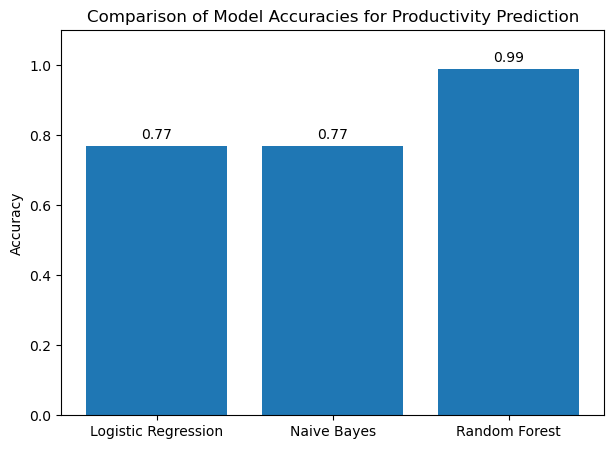

In [4]:
import matplotlib.pyplot as plt

# Model performance values
models = ["Logistic Regression", "Naive Bayes", "Random Forest"]
accuracies = [0.77, 0.77, 0.99]

# Plot
plt.figure(figsize=(7,5))
plt.bar(models, accuracies)
plt.ylim(0,1.1)
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies for Productivity Prediction")

# Add values above bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')

plt.show()

